<a href="https://colab.research.google.com/github/Rafi192/ML_Engineer_Task/blob/main/Resume_category_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Necessary Libraries**


In [ ]:
#Necessary dependecies
!pip install Wordcloud
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install re


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




Loading dataset

In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data='/content/drive/MyDrive/Resume_data/Resume.csv'

In [5]:
df=pd.read_csv(data)

## ***Exploratory Data Analysis(EDA)***

In [6]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [8]:
dropped_columns=['ID', 'Resume_html']
df=df.drop(dropped_columns, axis=1)

In [9]:
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


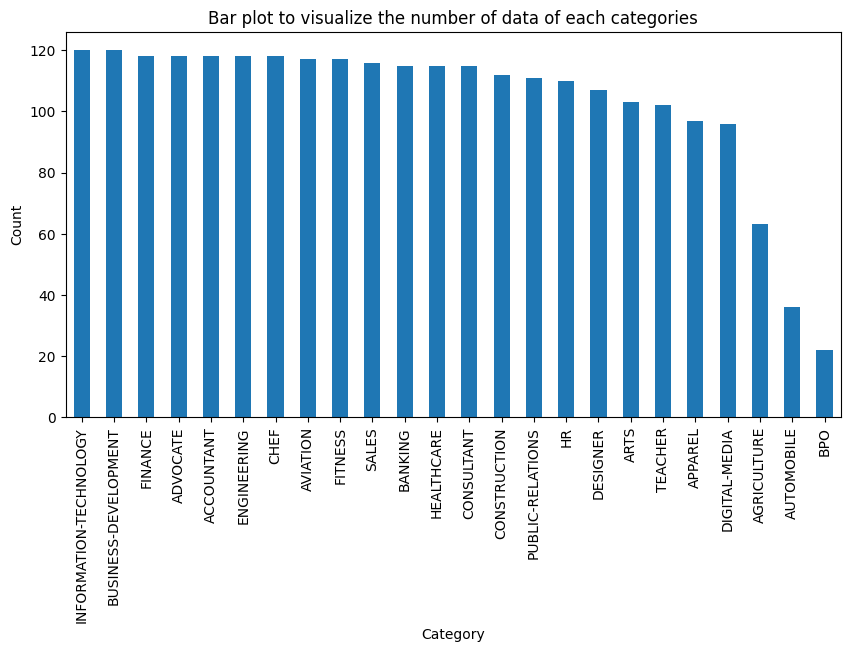

In [ ]:
#creating the bar plot to visualize the dataset
plt. figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.title('Bar plot to visualize the number of data of each categories')
plt.xlabel('Category')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()


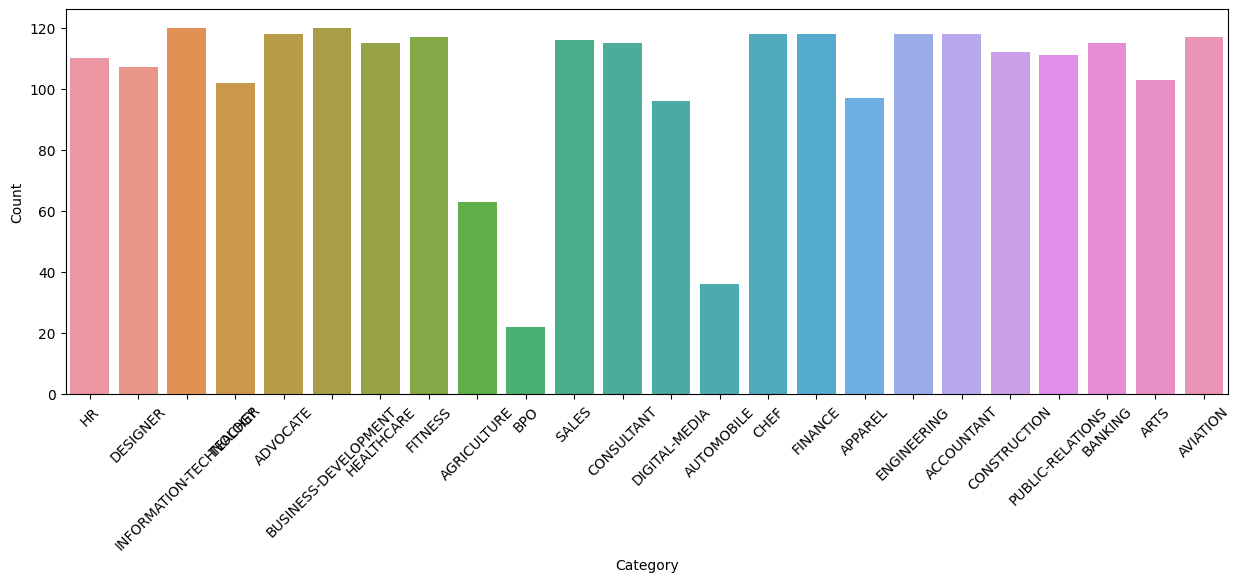

In [ ]:
#Now using seaborn to visualize the number of categories using countplot

plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [10]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

In [11]:

col_to_clean=['Resume_str']


def clean_data(text):
    text = text.lower()  # Converting all letters to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuations
    text = re.sub(r'<.*?>', '', text)  # Removing HTML tags
    text = re.sub(r'https\S+\s*', '', text)  # Removing http/urls
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing non-English letters

    text = re.sub(r'#\S+', '', text)  # Removing hashtags
    text = re.sub(r'@\S+', '', text)  # Removing mentions
    text = re.sub(r'\s+', ' ', text)  # Removing extra spaces
    text = re.sub(r'(.)\1+', r'\1', text)  # Removing repeated characters

    text=nltk.tokenize.word_tokenize(text) #Tokenizing words

    #text = [w for w in text if not w in nltk.corpus.stopwords.words('english')]

    stop_words=set(stopwords.words('english'))
    filtered_words = [w for w in text if w not in stop_words] #removing stopwords

    return ' '.join(filtered_words)

cleaned_df=df.copy()
cleaned_df[col_to_clean]=cleaned_df[col_to_clean].applymap(clean_data)


cleaned_df







,Resume_str,Category
0,hr administratormarketing asociate hr administ...,HR
1,hr specialist us hr operations sumary versatil...,HR
2,hr director sumary years experience recruiting...,HR
3,hr specialist sumary dedicated driven dynamic ...,HR
4,hr manager skil highlights hr skils hr departm...,HR
...,...,...
2479,rank sgte non comisioned oficer charge brigade...,AVIATION
2480,government relations comunications organizatio...,AVIATION
2481,gek squad agent profesional profile suport spe...,AVIATION
2482,program director ofice manager sumary highly p...,AVIATION


**Splitting the dataset into Training, validation and testing set**

In [12]:
train, validate, test = \
              np.split(cleaned_df.sample(frac=1, random_state=42 ),
                       [int(.6*len(cleaned_df)), int(.8*len(cleaned_df))])

train

,Resume_str,Category
420,kpandipou kofi sumary compasionate teaching pr...,TEACHER
1309,director digital transformation executive prof...,DIGITAL-MEDIA
2023,senior project manager profesional sumary ambi...,CONSTRUCTION
1360,chef sumary experienced catering chef skiled p...,CHEF
2186,operations manager sumary experienced client s...,BANKING
...,...,...
1976,construction manager sumary excelent superviso...,CONSTRUCTION
1645,product specialists profesional sumary obtain ...,APPAREL
1402,executive chef sumary years experience front b...,CHEF
2028,asistant manager sales relocation specialist s...,CONSTRUCTION


In [ ]:
validate

,Resume_str,Category
2133,transfer recruiteradmisions counselor carer ov...,PUBLIC-RELATIONS
724,medical record technician profesional sumary h...,HEALTHCARE
1314,global sr manager paid media profesional sumar...,DIGITAL-MEDIA
1743,selfsustaining enginering technician sumary ve...,ENGINEERING
269,information technology specialist experience i...,INFORMATION-TECHNOLOGY
...,...,...
169,cad designer sumary seking position respected ...,DESIGNER
2078,ward clerk unit secretary admisions dispositio...,PUBLIC-RELATIONS
1676,membership sales representative profesional pr...,APPAREL
1197,consultant carer focus busines profesional acu...,CONSULTANT


In [ ]:
test

,Resume_str,Category
1253,technical project manager sumary pmp certified...,DIGITAL-MEDIA
1276,digital research intern skils microsoft ofice ...,DIGITAL-MEDIA
912,program suport asistant experience june januar...,AGRICULTURE
491,family comunity advocate profesional sumary af...,ADVOCATE
953,lead senior sap auditor carer focus insightful...,AGRICULTURE
...,...,...
1638,asociate manager design michelehongsquarespace...,APPAREL
1095,sales asociate sumary ben ibc nearly year loki...,SALES
1130,consultant sumary resourceful marketing manage...,CONSULTANT
1294,media services cordinator sumary lifelong san ...,DIGITAL-MEDIA


**EDA after data preprocessing**

In [51]:
categories = np.sort(cleaned_df['Category'].unique())
len(categories)



24

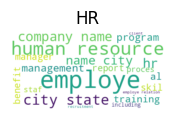

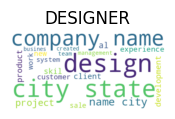

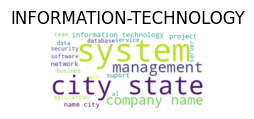

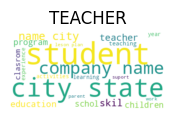

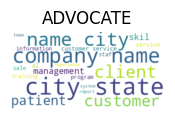

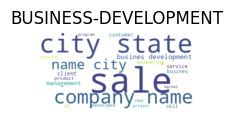

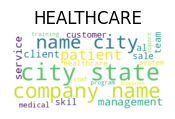

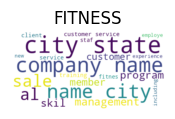

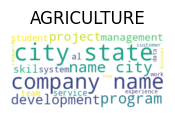

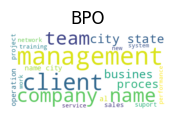

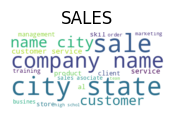

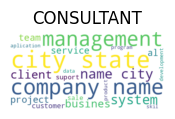

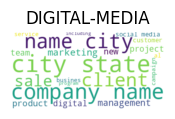

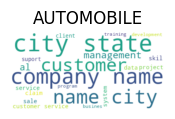

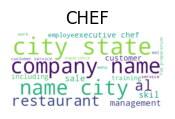

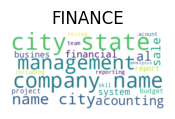

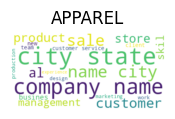

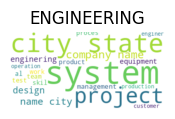

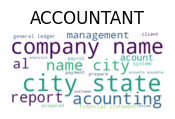

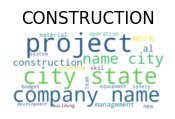

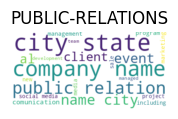

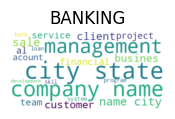

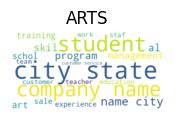

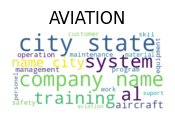

In [43]:

word_cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))

categories = cleaned_df['Category'].unique()

for category in categories:
    text_for_category = cleaned_df.loc[cleaned_df.Category == category, 'Resume_str'].str.cat(sep='\n')
    wordcloud = word_cloud.generate(text_for_category)

    plt.figure(figsize=(2, 4))
    plt.title(category)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


# ***Feature Extraction ***

In [41]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()
for i in var:
  cleaned_df[i]=le.fit_transform(cleaned_df[i])

cleaned_df

,Resume_str,Category
0,hr administratormarketing asociate hr administ...,19
1,hr specialist us hr operations sumary versatil...,19
2,hr director sumary years experience recruiting...,19
3,hr specialist sumary dedicated driven dynamic ...,19
4,hr manager skil highlights hr skils hr departm...,19
...,...,...
2479,rank sgte non comisioned oficer charge brigade...,6
2480,government relations comunications organizatio...,6
2481,gek squad agent profesional profile suport spe...,6
2482,program director ofice manager sumary highly p...,6


In [42]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and temporary (test + validation) sets
train_data, temp_data = train_test_split(cleaned_df, test_size=0.3, random_state=42)

# Splitting the temporary set into test and validation sets
test_data, validation_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))
print("Validation set size:", len(validation_data))


Train set size: 1738
Test set size: 373
Validation set size: 373


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

train_text=train_data['Resume_str'].values
train_target =train_data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',max_features=2000)
word_vectorizer.fit(train_text)
WordFeatures = word_vectorizer.transform(train_text)

WordFeatures


<1738x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 383474 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,train_target, random_state=1, test_size=0.2,
                                                 stratify=train_target)
print(X_train.shape)
print(X_test.shape)

(1390, 2000)
(348, 2000)


**Model Building and Model Training**

In [46]:
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

model=OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [47]:
prediction=model.predict(X_test)


In [49]:
prediction

array([22, 10, 23, 18,  9, 16, 21, 13, 18, 18,  2, 19, 21,  6, 14,  1, 10,
       17, 15, 23,  6, 19, 15, 23,  7,  6, 23,  7,  9, 18,  9, 12, 12, 19,
       16, 22, 18, 14, 21, 16, 14, 18,  9,  9, 11,  9, 23, 21, 23, 23, 19,
        0, 20,  7,  0,  9,  6,  2,  1, 12, 18, 22,  2,  0,  9,  9,  1,  0,
       13, 15,  9, 10,  7, 18, 19, 18, 10,  9,  9,  7,  9, 21, 17, 15, 23,
        7, 23, 23, 11,  9, 21, 18,  9,  9, 21,  4, 19, 10,  9, 15, 22, 19,
        6, 21,  9, 14, 16, 19, 22,  7,  0, 20, 21, 20, 16,  9, 20, 15,  9,
        1,  9, 14, 15, 15, 19, 21, 15,  9, 20, 15, 15, 11,  1, 11, 23, 18,
        1, 19, 21, 14,  9,  9, 17, 10, 18, 11, 21,  9, 12, 22,  7,  7, 21,
       20,  9,  5, 22,  9, 23, 12, 13, 21, 23, 12,  9,  0,  3, 19, 11, 19,
       15,  0, 10, 23, 13, 20, 21, 22, 21, 21, 21, 15,  0, 17, 23,  6, 14,
       19, 22, 20, 22,  9, 20,  0, 16, 18,  4,  6,  0,  9, 21, 15, 18, 12,
       16, 15, 20,  9, 12, 22, 20, 14, 12, 12,  9, 20,  1,  9, 11, 16, 16,
        0,  2,  1, 10, 10

In [ ]:
#Using teh ANN model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf



# Build the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(categories), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

In [60]:

from sklearn.metrics import accuracy_score
from sklearn import metrics

In [18]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train) #training the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) #

# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# saving the accuracy score
score = set()
score.add(('SVM', score_svm))


----------------------------------
The accuracy of the SVM is: 0.6695
----------------------------------


In [19]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)

score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")

score.add(('DT', score_dt))


---------------------------------
The accuracy of the DT is: 0.6092
---------------------------------


----------------------------------
The accuracy of the KNN is: 0.4282
----------------------------------


In [21]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_prediction_lr = model_lr.predict(X_test)


score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))


---------------------------------
The accuracy of the LR is: 0.6552
---------------------------------


In [22]:
from sklearn.metrics import classification_report

models = [model_svm, model_lr, model_dt,model_knn,model]

for model in models:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)

    print("Model:", model)
    print(report)
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: SVC()
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.94      0.83        16
              ADVOCATE       0.77      0.62      0.69        16
           AGRICULTURE       1.00      0.10      0.18        10
               APPAREL       0.57      0.29      0.38        14
                  ARTS       0.50      0.27      0.35        15
            AUTOMOBILE       0.00      0.00      0.00         5
              AVIATION       0.72      0.81      0.76        16
               BANKING       0.59      0.59      0.59        17
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.55      0.65      0.59        17
                  CHEF       0.88      0.94      0.91        16
          CONSTRUCTION       0.82      0.64      0.72        14
            CONSULTANT       0.33      0.38      0.35        16
              DESIGNER       0.83      0.67      0.74        15
         DIGITAL-MEDIA    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)


The accuracy scores of different Models:
----------------------------------------
('SVM', 0.6695)
('KNN', 0.4282)
('DT', 0.6092)
('LR', 0.6552)


In [50]:
from sklearn.multiclass import OneVsRestClassifier
knnModel = OneVsRestClassifier(KNeighborsClassifier())
knnModel.fit(X_train, y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
# using grid search for find optimal values for RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 2, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(X_train,y_train)

print(grid_search.best_params_)

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
RF_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [57]:
prediction=RF_Model.predict(X_test)
prediction

array(['DESIGNER', 'PUBLIC-RELATIONS', 'TEACHER', 'HEALTHCARE',
       'CONSTRUCTION', 'HR', 'BANKING', 'PUBLIC-RELATIONS',
       'BUSINESS-DEVELOPMENT', 'DIGITAL-MEDIA', 'DIGITAL-MEDIA', 'HR',
       'HEALTHCARE', 'ADVOCATE', 'ENGINEERING', 'DESIGNER', 'AVIATION',
       'ACCOUNTANT', 'INFORMATION-TECHNOLOGY', 'AVIATION', 'TEACHER',
       'PUBLIC-RELATIONS', 'HR', 'BUSINESS-DEVELOPMENT', 'ACCOUNTANT',
       'FINANCE', 'BUSINESS-DEVELOPMENT', 'FINANCE', 'SALES',
       'PUBLIC-RELATIONS', 'INFORMATION-TECHNOLOGY', 'FITNESS',
       'DIGITAL-MEDIA', 'CHEF', 'ACCOUNTANT', 'DESIGNER', 'TEACHER',
       'PUBLIC-RELATIONS', 'ENGINEERING', 'CHEF', 'CONSTRUCTION',
       'FITNESS', 'DESIGNER', 'BUSINESS-DEVELOPMENT', 'TEACHER',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'PUBLIC-RELATIONS',
       'ACCOUNTANT', 'CONSTRUCTION', 'DESIGNER', 'ACCOUNTANT', 'TEACHER',
       'ACCOUNTANT', 'INFORMATION-TECHNOLOGY', 'ACCOUNTANT', 'SALES',
       'BUSINESS-DEVELOPMENT', 'BANKING', 'BUSINE

In [58]:
print("training Score: {:.2f}".format(RF_Model.score(X_train, y_train)))
print("test Score: {:.2f}".format(RF_Model.score(X_test, y_test)))

training Score: 0.88
test Score: 0.60


In [ ]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (RF_Model, metrics.classification_report(y_test, prediction)))

model report: RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42): 
                         precision    recall  f1-score   support

            ACCOUNTANT       0.57      0.93      0.70        14
              ADVOCATE       0.80      0.57      0.67        14
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       1.00      0.31      0.47        13
                  ARTS       0.00      0.00      0.00        12
            AUTOMOBILE       0.00      0.00      0.00         4
              AVIATION       0.71      0.77      0.74        13
               BANKING       0.57      0.80      0.67        15
                   BPO       0.00      0.00      0.00         3
  BUSINESS-DEVELOPMENT       0.67      0.29      0.40        14
                  CHEF       0.74      0.93      0.82        15
          CONSTRUCTION       0.64      1.00      0.78        16
            CONSULTANT       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
